### Maze Generation

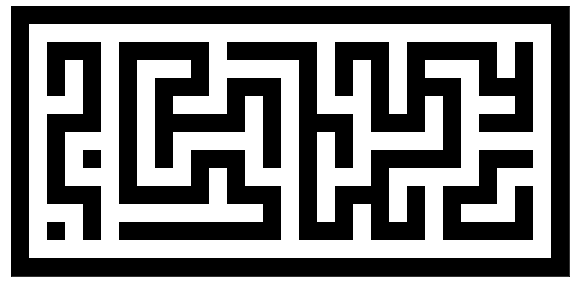

In [14]:
import numpy
import matplotlib.pyplot as pyplot
from random import randint

def generate(width=81, height=51):
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    complexity = int(1.0 * (5 * (shape[0] + shape[1])))
    density    = int(1.0 * (shape[0] // 2 * shape[1] // 2))
    Z = numpy.zeros(shape, dtype=bool)
    Z[0, :] = Z[-1, :] = 1  # 1 (True) is a wall, 0 (False) is a path
    Z[:, 0] = Z[:, -1] = 1
    for i in range(density):
        x, y = randint(0, shape[1] // 2) * 2, randint(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[randint(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

def draw_maze(maze):
    image = numpy.array( [ [1.0, 1.0, 1.0], [0.0, 0.0, 0.0] ] )[maze.astype(int)]
    pyplot.figure(figsize=(10, 5))
    pyplot.xticks([]), pyplot.yticks([])
    pyplot.imshow(image, interpolation='nearest')
    pyplot.show()


maze = generate(30, 15)
draw_maze(maze)

### Dijkstra's algorithm (for 'dict-of-dict' data source)

In [2]:
def dijkstra(graph, current, end):
    start = current
    visited_weight = {current:0}
    previousnode = {}
    processed = []
    while current != end:
        for value in graph[current]:
            if value not in processed:
                cost = visited_weight[current] + graph[current][value]
                if value not in visited_weight or visited_weight[value] > cost:
                    visited_weight[value] = cost
                    previousnode[value] = current
        processed.append(current)
        current = getnext(visited_weight, processed)
    print("Shortest path found: ", printpath(previousnode, end, start))
    print("Shortest path cost:  ", visited_weight[end])

def getnext(visited_weight, processed):
    minval = 9999
    for key in visited_weight:
        if key not in processed and visited_weight[key] < minval:
                minval = visited_weight[key]
    for key in visited_weight:
        if visited_weight[key] == minval and key not in processed:
            return key

def printpath(previousnode, end, start):
    path = ""+end
    while end != start:
        path = previousnode[end] + path
        end = previousnode[end]
    return path

In [3]:
Graphe_ = { 
     'A':{'B':2, 'C':1}, 
     'B':{'A':2, 'C':2, 'D':1, 'E':3}, 
     'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5}, 
     'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5}, 
     'E':{'B':3, 'C':3, 'D':3, 'F':1}, 
     'F':{'C':5, 'D':6, 'E':1, 'G':2}, 
     'G':{'D':5, 'F':2} }

dijkstra(Graphe_, 'A', 'G')

Shortest path found:  ACEFG
Shortest path cost:   7


### Maze generation using Prim

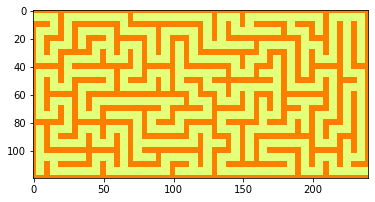

In [15]:
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

num_rows = 12
num_cols = 24 

def prim_maze():
    M = np.zeros((num_rows, num_cols, 5))
    image = np.zeros((num_rows * 10, num_cols * 10))
    r = 0
    c = 0
    hist = [(r, c)]
    while hist:
        M[r, c, 4] = 1
        check = []
        # Checks what directions are valid for the next cell
        if c > 0 and M[r, c - 1, 4] == 0:
            check.append('L') # Left
        if r > 0 and M[r - 1, c, 4] == 0:
            check.append('U') # Up
        if c < num_cols - 1 and M[r, c + 1, 4] == 0:
            check.append('R') # Right
        if r < num_rows - 1 and M[r + 1, c, 4] == 0:
            check.append('D') # Down
        if len(check):
            hist.append([r, c])
            move_direction = random.choice(check)
            # Adds the next cell
            if move_direction == 'L':
                M[r, c, 0] = 1
                c = c - 1
                M[r, c, 2] = 1
            if move_direction == 'U':
                M[r, c, 1] = 1
                r = r - 1
                M[r, c, 3] = 1
            if move_direction == 'R':
                M[r, c, 2] = 1
                c = c + 1
                M[r, c, 0] = 1
            if move_direction == 'D':
                M[r, c, 3] = 1
                r = r + 1
                M[r, c, 1] = 1
        else:
            r, c = hist.pop()
 
    M[0, 0, 0] = 1 # Entry (top left)
    M[num_rows - 1, num_cols - 1, 2] = 1 # Exit (bottom right)

    # Image generation
    for row in range(0, num_rows):
        for col in range(0, num_cols):
            cell_data = M[row, col]
            for i in range(10 * row + 2, 10 * row + 8):
                image[i, range(10 * col + 2, 10 * col + 8)] = 255
            if cell_data[0] == 1:
                image[range(10 * row + 2, 10 * row + 8), 10 * col] = 255
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 1] = 255
            if cell_data[1] == 1:
                image[10 * row, range(10 * col + 2, 10 * col + 8)] = 255
                image[10 * row + 1, range(10 * col + 2, 10 * col + 8)] = 255
            if cell_data[2] == 1:
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 9] = 255
                image[range(10 * row + 2, 10 * row + 8), 10 * col + 8] = 255
            if cell_data[3] == 1:
                image[10 * row + 9, range(10 * col + 2, 10 * col + 8)] = 255
                image[10 * row + 8, range(10 * col + 2, 10 * col + 8)] = 255
    return M, image
 

def show_maze(Maze):
    plt.imshow(Maze, cmap=cm.Wistia_r, interpolation='none')
    plt.show()



M, image = prim_maze()
show_maze(image)

### Breadth-first path resolution

In [16]:
from collections import deque

def find_path_bfs(M):
    path = np.zeros((num_rows, num_cols, 2))
    visited = np.zeros((num_rows, num_cols))
    visited[0][0] = 1
    queue = deque()
    queue.append((0, 0))
    while(queue):
        temp = queue.popleft()
        nextrow = temp[0]
        nextcol = temp[1]
        if (nextcol == num_cols - 1) and (nextrow == num_rows - 1):
            return path
        if (nextcol > 0) and (not visited[nextrow][nextcol - 1]) and (M[nextrow][nextcol][0]):
            visited[nextrow][nextcol] = 1
            queue.append((nextrow, nextcol - 1))
            path[nextrow][nextcol - 1][0] = nextrow
            path[nextrow][nextcol - 1][1] = nextcol
        if (nextrow > 0) and (not visited[nextrow - 1][nextcol]) and (M[nextrow][nextcol][1]):
            visited[nextrow][nextcol] = 1
            queue.append((nextrow - 1, nextcol))
            path[nextrow - 1][nextcol][0] = nextrow
            path[nextrow - 1][nextcol][1] = nextcol
        if (nextcol < num_cols - 1) and (not visited[nextrow][nextcol + 1]) and (M[nextrow][nextcol][2]):
            visited[nextrow][nextcol] = 1
            queue.append((nextrow, nextcol + 1))
            path[nextrow][nextcol + 1][0] = nextrow
            path[nextrow][nextcol + 1][1] = nextcol
        if (nextrow < num_rows - 1) and (not visited[nextrow + 1][nextcol]) and (M[nextrow][nextcol][3]):
            visited[nextrow][nextcol] = 1
            queue.append((nextrow + 1, nextcol))
            path[nextrow + 1][nextcol][0] = nextrow
            path[nextrow + 1][nextcol][1] = nextcol
 

In [17]:
path = find_path_bfs(M)

### Displaying the resolved path

In [18]:
def show_path(image, path):
    plt.imshow(image, cmap=cm.Wistia_r, interpolation='none')
    plt.ion()
    stack = []
    nr = num_rows - 1
    nc = num_cols - 1
    stack.append((nr, nc + 1))
    stack.append((nr, nc))
    while nr or nc:
        tr = nr
        tc = nc
        nr = (int)(path[tr][tc][0])
        nc = (int)(path[tr][tc][1])
        stack.append((nr, nc))
    pr = 0
    pc = 0
    dir = 2
    path_color = 100
    while(stack):
        temp = stack.pop()
        nr = temp[0]
        nc = temp[1]
        if nr or nc:
            if (nr == pr):
                if (nc > pc):
                    # print("R")
                    if (dir == 2):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 10)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 10)] = path_color
                    elif (dir == 1):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = path_color
                    elif (dir == 3):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = path_color
                    dir = 2
                else:
                    # print("L")
                    if (dir == 0):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 10)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 10)] = path_color
                    elif (dir == 1):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = path_color
                    elif (dir == 3):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = path_color
                    dir = 0
            elif (nc == pc):
                if (nr > pr):
                    # print("D")
                    if (dir == 3):
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 5] = path_color
                    elif (dir == 0):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = path_color
                    elif (dir == 2):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 4, 10 * pr + 10),
                              10 * pc + 5] = path_color
                    dir = 3
                else:
                    # print("U")
                    if (dir == 1):
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 0, 10 * pr + 10),
                              10 * pc + 5] = path_color
                    elif (dir == 0):
                        image[10 * pr + 4,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 4, 10 * pc + 10)] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = path_color
                    elif (dir == 2):
                        image[10 * pr + 4,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[10 * pr + 5,
                              range(10 * pc + 0, 10 * pc + 6)] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 4] = path_color
                        image[range(10 * pr + 0, 10 * pr + 6),
                              10 * pc + 5] = path_color
                    dir = 1
            pr = nr
            pc = nc
            plt.clf()
            plt.imshow(image, cmap=cm.Wistia_r, interpolation='none')
            if (stack):
                plt.ion()
            else:
                plt.ioff()
                plt.show()


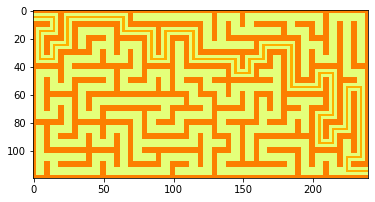

In [19]:
show_path(image, path)